In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

这一部分我们做点时间维度相关的分析，比如看看到底这个城市的人周末骑自行车出行多，还是工作日多<br>
也就是咱们看看大家都是骑车出去玩，还是去工作。

# 4.1 区分工作日和周末

加载数据

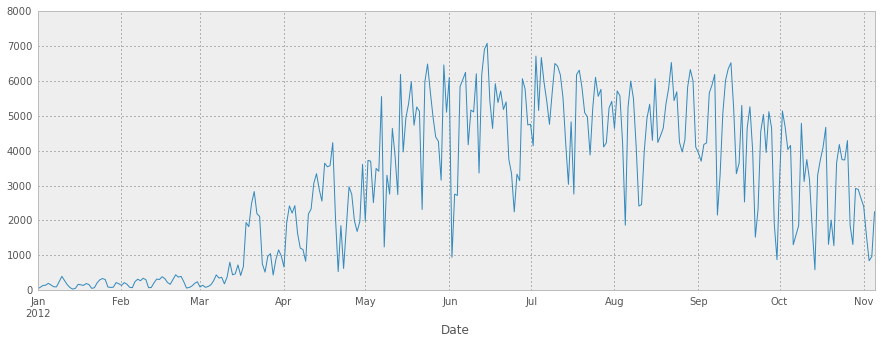

In [2]:
bikes = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()

咱们先随便选一列出来吧，比如选'Berri 1'单独成一个berri_bikes的dataframe

In [3]:
berri_bikes = bikes[['Berri 1']].copy()

In [4]:
berri_bikes[:5]

Berri 1
Date               
2012-01-01       35
2012-01-02       83
2012-01-03      135
2012-01-04      144
2012-01-05      197

然后为了区分工作日和周末，我们加一列'weekday'。<br>
对了，这里要提到一个概念，叫做index，也就是大家在数据库里面熟知的索引，在dataframe里面也有，比如我们刚才的数据，index就是日期。

In [5]:
berri_bikes.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-01-01, ..., 2012-11-05]
Length: 310, Freq: None, Timezone: None

如果仔细观察，你会发现里面有些天的数据丢失了。（牛逼的数据分析师真的一眼能看出来，咳咳，反正我也没一眼看出来）<br>
我们通过`.day`可以直接看到是一个月的第几天。

In [6]:
berri_bikes.index.day

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13

然后我们发个大招，其实dataframe对于日期类型的数据，可以直接知道是星期几！！！

In [7]:
berri_bikes.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

其中0是星期一，1是星期二，以此类推。所以我们可以直接生成一列，指明是星期几啦。

In [8]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

Berri 1  weekday
Date                        
2012-01-01       35        6
2012-01-02       83        0
2012-01-03      135        1
2012-01-04      144        2
2012-01-05      197        3

# 4.2 分组+排序+聚合统计

用过SQL里面的groupby吗，恰巧pandas的dataframe也有一个`.groupby()`函数，而且好用得一塌糊涂。

比如呢，下面这句 `berri_bikes.groupby('weekday').aggregate(sum)` 的意思就是说，“你给老纸把数据按照星期几分一下组，然后给我加和一下，结果返给我！！！”

In [9]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

Berri 1
weekday         
0         134298
1         135305
2         152972
3         160131
4         141771
5         101578
6          99310

哦，对了，我也不喜欢数字0, 1, 2, 3, 4, 5, 6，像我这种智商欠费的同学，根本对应不上星期几，所以取个名字好了，然后加上去。

In [10]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

Berri 1
Monday      134298
Tuesday     135305
Wednesday   152972
Thursday    160131
Friday      141771
Saturday    101578
Sunday       99310

完美！然后我们再画个图，哈哈哈，又是画图！

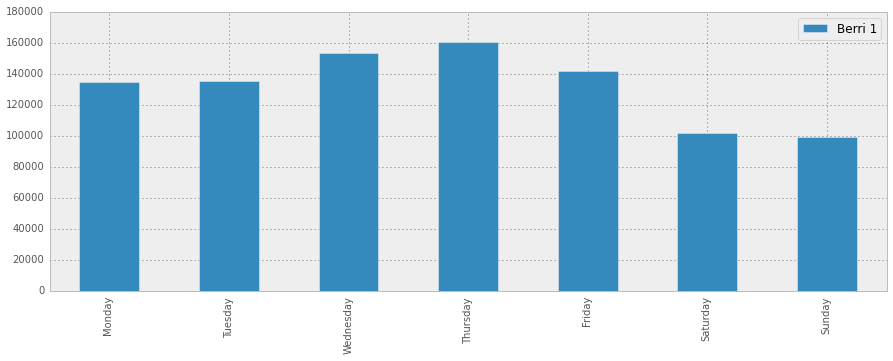

In [11]:
weekday_counts.plot(kind='bar')

看似这个地区的同学骑自行车很多时候是工作日骑的，是去上班？

# 4.3 把刚才学的放一块儿

把刚才学到的东西串一块儿，能看到很神奇pandas处理结果啦。<br>
你可以试试把`sum` 换做 `max`或者`numpy.median`，求最大和平均，也可以试试更多的函数！！

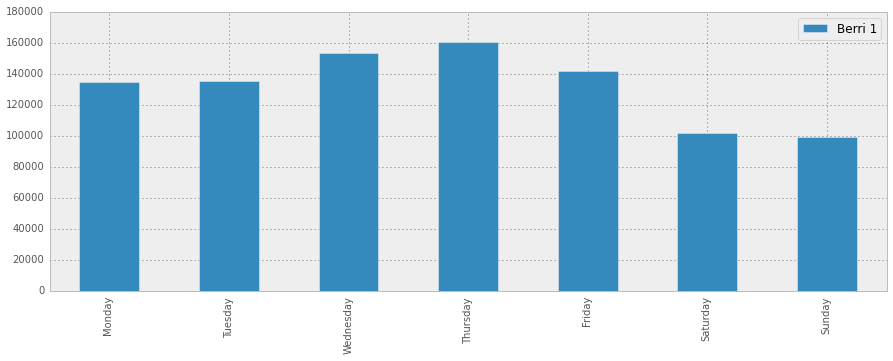

In [12]:
bikes = pd.read_csv('../data/bikes.csv', 
                    sep=';', encoding='latin1', 
                    parse_dates=['Date'], dayfirst=True, 
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')